# Assignment 4.2 - ( 3.1,3.2, 4.1& 4.2)

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

## Chapter 3 Exercises

**Exercise:** In Chapter 3 we computed the mean of a sample by adding up
the elements and dividing by n.  If you are given a PMF, you can
still compute the mean, but the process is slightly different:
%
$$ \xbar = \sum_i p_i~x_i $$
%
where the $x_i$ are the unique values in the PMF and $p_i=PMF(x_i)$.
Similarly, you can compute variance like this:
%
$$ S^2 = \sum_i p_i~(x_i - \xbar)^2 $$
% 
Write functions called `PmfMean` and `PmfVar` that take a
Pmf object and compute the mean and variance.  To test these methods,
check that they are consistent with the methods `Mean` and `Var`
provided by `Pmf`.

In [150]:
def PmfMean(pmf):
    """Computes the mean of a PMF.
    Returns:
        float mean
    """
    return sum(p * x for x, p in pmf.Items())

In [151]:
def PmfVar(pmf, mu=None):
    """Computes the variance of a PMF.

    Args:
        mu: the point around which the variance is computed;
            if omitted, computes the mean

    Returns:
        float variance
    """
    if mu is None:
        mu = pmf.Mean()

    var = 0.0
    for x, p in pmf.d.items():
        var += p * (x - mu) ** 2
    return var

**Exercise:** Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable `numkdhh` to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

In [152]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [153]:
resp = nsfg.ReadFemResp()

Use the NSFG respondent variable numkdhh to construct the actual distribution for the number of children under 18 in the respondents' households.

In [154]:
numkids_pmf = thinkstats2.Pmf(resp.numkdhh, label="Num Kids")

In [155]:
numkids_pmf

Pmf({0: 0.466178202276593, 1: 0.21405207379301322, 2: 0.19625801386889966, 3: 0.08713855815779145, 4: 0.025644380478869556, 5: 0.01072877142483318}, 'Num Kids')

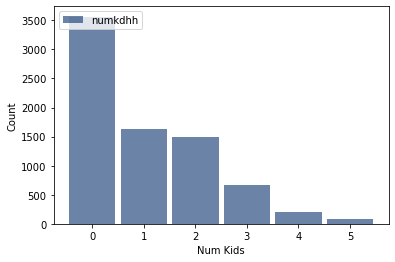

In [156]:
# Create histogram of actual number of kids

hist = thinkstats2.Hist(resp.numkdhh, label="numkdhh")
thinkplot.Hist(hist)
thinkplot.Config(xlabel="Num Kids", ylabel="Count")

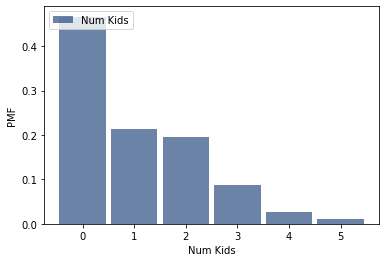

In [157]:
# Plot the pmf of number of kids

thinkplot.Hist(numkids_pmf)
thinkplot.Config(xlabel="Num Kids", ylabel="PMF")

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

In [158]:
def BiasPmf(numkids_pmf, label):
    new_pmf = numkids_pmf.Copy(label=label)

    for x, p in numkids_pmf.Items():
        new_pmf.Mult(x, x)

    new_pmf.Normalize()
    return new_pmf

In [159]:
BiasPmf(numkids_pmf, label = "numkdhh")

Pmf({0: 0.0, 1: 0.20899335717935616, 2: 0.38323965252938175, 3: 0.25523760858456823, 4: 0.10015329586101177, 5: 0.052376085845682166}, 'numkdhh')

Plot the actual and biased distributions, and compute their means.

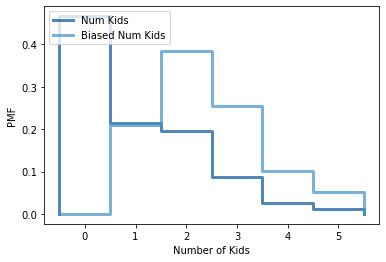

In [160]:
# Plot the pmf of actual number of kids (Num Kids) and the biased number of kids (Biased Num Kids)

numkids_biased_pmf = BiasPmf(numkids_pmf, label="Biased Num Kids")
thinkplot.PrePlot(2)
thinkplot.Pmfs([numkids_pmf, numkids_biased_pmf])
thinkplot.Config(xlabel="Number of Kids", ylabel="PMF")

In [161]:
# We can use built in functions to calculate the mean

print("Actual mean", numkids_pmf.Mean())
print("Observed mean", numkids_biased_pmf.Mean())

Actual mean 1.024205155043831
Observed mean 2.403679100664282


In [162]:
# Or we can use the function that was defined above

PmfMean(numkids_pmf)

1.024205155043831

In [163]:
PmfMean(numkids_biased_pmf)

2.403679100664282

# Chapter 4

Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

## Exercises

**Exercise:** How much did you weigh at birth? If you don’t know, call your mother or someone else who knows. Using the NSFG data (all live births), compute the distribution of birth weights and use it to find your percentile rank. If you were a first baby, find your percentile rank in the distribution for first babies. Otherwise use the distribution for others. If you are in the 90th percentile or higher, call your mother back and apologize.

--Seven pounds eight oz--

In [164]:
import first

live, firsts, others = first.MakeFrames()

In [165]:
first_wgt = firsts.totalwgt_lb
first_wgt_dropna = first_wgt.dropna()
print('Firsts', len(first_wgt), len(first_wgt_dropna))

first_pmf = thinkstats2.Pmf(first_wgt_dropna, label='first')

Firsts 4413 4363


In [166]:
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

In [167]:
PercentileRank(first_wgt, 7.5)

59.09811919329255

Exercise: The numbers generated by numpy.random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from numpy.random.random and plot their PMF. What goes wrong?

Now plot the CDF. Is the distribution uniform?

In [168]:
from numpy import random

In [169]:
random_array = np.random.random(size=1000)

In [170]:
print(random_array)

[0.80980361 0.1380275  0.11646776 0.71298689 0.75794514 0.19437551
 0.1400863  0.5388804  0.18116964 0.91678321 0.02651885 0.9704293
 0.49721326 0.69635827 0.88067726 0.90253321 0.27165056 0.00501812
 0.15223722 0.07313028 0.48625479 0.41549483 0.45194693 0.96915065
 0.69862434 0.0126055  0.14535535 0.48695466 0.838371   0.28471798
 0.1187464  0.80098822 0.10710569 0.57394058 0.06486832 0.23983267
 0.57826847 0.22852626 0.38508587 0.42466554 0.04394862 0.61832423
 0.0765057  0.83259382 0.44873309 0.44654415 0.53841102 0.35247342
 0.65437774 0.19610056 0.63692986 0.77657231 0.57359317 0.58806993
 0.45799516 0.98758008 0.57852124 0.3601909  0.59355074 0.10191333
 0.66937967 0.38994267 0.79928716 0.3099497  0.11602976 0.31828294
 0.86341312 0.44977365 0.69352728 0.41898312 0.01373102 0.00765562
 0.35508311 0.13090848 0.52694433 0.47649362 0.22721856 0.6606388
 0.14933689 0.21092679 0.98449194 0.24468138 0.38828484 0.99089778
 0.18505377 0.06236112 0.82315304 0.11717912 0.09386506 0.828974

In [171]:
random_pmf = thinkstats2.Pmf(random_array, label='Random')

In [172]:
random_pmf

Pmf({0.8098036079773376: 0.001, 0.138027496683649: 0.001, 0.11646775713896951: 0.001, 0.7129868920482827: 0.001, 0.7579451362098165: 0.001, 0.19437550553699778: 0.001, 0.1400863017935179: 0.001, 0.5388803990995258: 0.001, 0.18116963897189853: 0.001, 0.9167832062117565: 0.001, 0.02651884808755145: 0.001, 0.9704292997871351: 0.001, 0.49721325744421807: 0.001, 0.6963582664450773: 0.001, 0.880677262648707: 0.001, 0.9025332114207351: 0.001, 0.2716505572954543: 0.001, 0.005018116502945591: 0.001, 0.15223722053696442: 0.001, 0.07313027613117873: 0.001, 0.48625478541340594: 0.001, 0.41549482929432824: 0.001, 0.45194693484333626: 0.001, 0.9691506450420915: 0.001, 0.6986243441650214: 0.001, 0.012605495879090878: 0.001, 0.1453553527005378: 0.001, 0.4869546644273791: 0.001, 0.838370997365755: 0.001, 0.2847179840702163: 0.001, 0.11874639805597298: 0.001, 0.8009882231091029: 0.001, 0.10710568535870224: 0.001, 0.5739405825133861: 0.001, 0.06486831805113291: 0.001, 0.23983266955339955: 0.001, 0.578268

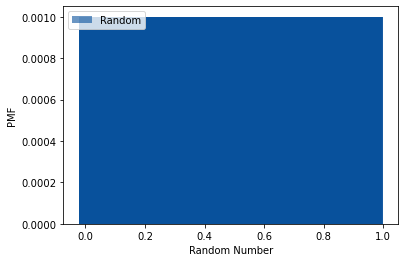

In [173]:
thinkplot.PrePlot(2)
thinkplot.Hist(random_pmf, align='right', width=width)
thinkplot.Config(xlabel='Random Number', ylabel='PMF')

The code is a block because the probability of each random number occurring is the same. 

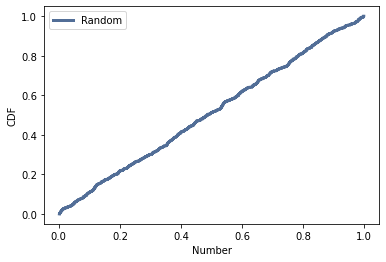

In [174]:
random_cdf = thinkstats2.Cdf(random_array, label='Random')
thinkplot.Cdf(random_cdf)
thinkplot.Config(xlabel='Number', ylabel='CDF', loc='upper left')

The distribution is uniform because the percentiles are the same length for each section.